In [1]:
import pandas as pd
from sklearn.metrics import roc_auc_score, accuracy_score, recall_score, mean_squared_error, roc_curve, auc, log_loss

In [2]:
data = pd.read_csv("./voice.csv")

In [3]:
data

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,0.131884,0.084734,0.153707,0.049285,0.201144,0.151859,1.762129,6.630383,0.962934,0.763182,...,0.131884,0.182790,0.083770,0.262295,0.832899,0.007812,4.210938,4.203125,0.161929,female
3164,0.116221,0.089221,0.076758,0.042718,0.204911,0.162193,0.693730,2.503954,0.960716,0.709570,...,0.116221,0.188980,0.034409,0.275862,0.909856,0.039062,3.679688,3.640625,0.277897,female
3165,0.142056,0.095798,0.183731,0.033424,0.224360,0.190936,1.876502,6.604509,0.946854,0.654196,...,0.142056,0.209918,0.039506,0.275862,0.494271,0.007812,2.937500,2.929688,0.194759,female
3166,0.143659,0.090628,0.184976,0.043508,0.219943,0.176435,1.591065,5.388298,0.950436,0.675470,...,0.143659,0.172375,0.034483,0.250000,0.791360,0.007812,3.593750,3.585938,0.311002,female


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

In [5]:
data.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

In [6]:
data[['label']].value_counts()

label 
female    1584
male      1584
dtype: int64

In [7]:
data['label'] = data['label'].map({'male': 0, 'female': 1})

In [8]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [9]:
#标准化
from sklearn.preprocessing import StandardScaler

In [10]:
scaler = StandardScaler()

In [11]:
X[:] = scaler.fit_transform(X)

In [12]:
X

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
0,-4.049248,0.427355,-4.224901,-2.576102,-5.693607,-0.214778,2.293306,1.762946,-0.039083,0.471575,-2.141210,-4.049248,-1.812038,-1.097998,0.565959,-1.564205,-0.708404,-1.431422,-1.419137,-1.454772
1,-3.841053,0.611669,-3.999293,-2.486885,-5.588987,-0.258485,4.548056,4.433008,-0.065236,0.594431,-2.141210,-3.841053,-1.079594,-1.091533,-0.294030,-1.561916,-0.708404,-1.418107,-1.405818,-1.014103
2,-3.463066,1.603848,-4.095851,-2.706986,-3.928699,0.909326,6.513656,7.326207,-1.083730,0.398261,-2.141210,-3.463066,-1.365368,-1.100397,0.410480,-1.563866,-0.708404,-1.429203,-1.416917,-1.065344
3,-0.992157,0.899998,-0.759454,-0.901418,-0.711205,0.632690,-0.449858,-0.240099,1.516383,1.797340,-1.054576,-0.992157,-1.666966,-0.988934,-0.294030,-1.195367,-0.708404,-1.273867,-1.261532,0.614286
4,-1.530640,1.322561,-1.676948,-1.268395,-0.792029,1.005588,-0.480911,-0.238940,1.708336,2.114740,-0.790514,-1.530640,-1.127233,-1.034015,0.260185,-0.221660,-0.708404,0.124154,0.136933,0.289046
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,-1.638842,1.658182,-0.877839,-1.873163,-0.999378,1.579141,-0.325020,-0.221916,1.507749,1.999883,0.460602,-1.638842,1.237885,2.444087,0.114817,0.007024,-0.708404,-0.237556,-0.224892,-0.098989
3164,-2.162452,1.927682,-2.994482,-2.008095,-0.840021,1.820721,-0.577009,-0.252503,1.458418,1.697831,-1.963949,-2.162452,1.429532,-0.124536,0.565959,0.153573,-0.214641,-0.388453,-0.384717,0.871981
3165,-1.298773,2.322724,-0.051973,-2.199039,-0.017123,2.492666,-0.298044,-0.222108,1.150198,1.385857,-2.037497,-1.298773,2.077781,0.140728,0.565959,-0.637833,-0.708404,-0.599266,-0.586717,0.175887
3166,-1.245202,2.012196,-0.017728,-1.991852,-0.204021,2.153653,-0.365367,-0.231123,1.229850,1.505711,0.607848,-1.245202,0.915445,-0.120678,-0.294030,-0.072080,-0.708404,-0.412863,-0.400255,1.149161


In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_eval, y_train, y_eval = train_test_split(X, y, shuffle=True, test_size=0.2, stratify= y, random_state=2022)

#### lr

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)
y_pred = model_lr.predict(X_eval)

In [17]:
accuracy_score(y_pred, y_eval)

0.9700315457413249

In [18]:
#特征筛选
#列出LR模型的各个特征的系数
model_lr.coef_[0], model_lr.feature_names_in_

(array([ 6.43660367e-02, -6.19661140e-01,  1.82342073e-01,  8.64617250e-01,
        -4.74035927e-01, -1.24570791e+00,  2.47977801e-01,  2.37220768e-01,
        -1.18108913e+00,  1.73257762e+00, -2.55593641e-01,  6.43660367e-02,
         4.97101048e+00, -6.40490020e-01, -5.85515918e-04,  2.87976644e-04,
        -7.58171527e-02,  9.28044511e-03,  1.06467814e-02,  3.71007751e-01]),
 array(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
        'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
        'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx'], dtype=object))

In [19]:
model_lr.feature_names_in_

array(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx'], dtype=object)

In [20]:
df_fea_coef = pd.DataFrame(columns=['col', 'coef', 'coef_abs'])
for i, fea in enumerate(model_lr.feature_names_in_):
    df_fea_coef = df_fea_coef.append(pd.DataFrame([[fea, model_lr.coef_[0][i], abs(model_lr.coef_[0][i])]], columns=['col', 'coef', 'coef_abs']))

In [21]:
df_fea_coef.sort_values(by='coef_abs', ascending=False)

,col,coef,coef_abs
0,meanfun,4.971010,4.971010
0,sfm,1.732578,1.732578
0,IQR,-1.245708,1.245708
0,sp.ent,-1.181089,1.181089
0,Q25,0.864617,0.864617
0,minfun,-0.640490,0.640490
0,sd,-0.619661,0.619661
0,Q75,-0.474036,0.474036
0,modindx,0.371008,0.371008
0,mode,-0.255594,0.255594


#### SVM

In [22]:
from sklearn.svm import SVC

In [23]:
# ?SVC

In [24]:
model_svc = SVC(kernel='rbf', verbose=True)
model_svc.fit(X_train, y_train)
y_pred = model_svc.predict(X_eval)

[LibSVM]

In [25]:
accuracy_score(y_pred, y_eval)

0.9794952681388013

#### xgboost

In [26]:
import xgboost as xgb

In [27]:
model_xgb = xgb.XGBClassifier(
            max_depth=6, learning_rate=0.05, n_estimators=2000, 
            objective='binary:logistic', tree_method='hist', 
            subsample=0.8, colsample_bytree=0.8, 
            min_child_samples=3, eval_metric='auc', reg_lambda=0.5
        )


In [28]:
model_xgb.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_eval, y_eval)], early_stopping_rounds=200, verbose=True)

[11:34:14] WARNING: ..\src\learner.cc:576: 
Parameters: { "min_child_samples" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-auc:0.98891	validation_1-auc:0.98283
[1]	validation_0-auc:0.99522	validation_1-auc:0.99195
[2]	validation_0-auc:0.99774	validation_1-auc:0.99308
[3]	validation_0-auc:0.99773	validation_1-auc:0.99316
[4]	validation_0-auc:0.99867	validation_1-auc:0.99316
[5]	validation_0-auc:0.99872	validation_1-auc:0.99301
[6]	validation_0-auc:0.99873	validation_1-auc:0.99308
[7]	validation_0-auc:0.99881	validation_1-auc:0.99317
[8]	validation_0-auc:0.99890	validation_1-auc:0.99315
[9]	validation_0-auc:0.99893	validation_1-auc:0.99318
[10]	validation_0-auc:0.99896	validation_1-auc:0.99443
[11]	validation_0-auc:0.99906	validat

D:\anaconda3\envs\tens\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[36]	validation_0-auc:0.99979	validation_1-auc:0.99692
[37]	validation_0-auc:0.99981	validation_1-auc:0.99708
[38]	validation_0-auc:0.99982	validation_1-auc:0.99728
[39]	validation_0-auc:0.99984	validation_1-auc:0.99729
[40]	validation_0-auc:0.99984	validation_1-auc:0.99728
[41]	validation_0-auc:0.99985	validation_1-auc:0.99719
[42]	validation_0-auc:0.99986	validation_1-auc:0.99723
[43]	validation_0-auc:0.99986	validation_1-auc:0.99739
[44]	validation_0-auc:0.99987	validation_1-auc:0.99733
[45]	validation_0-auc:0.99988	validation_1-auc:0.99730
[46]	validation_0-auc:0.99988	validation_1-auc:0.99729
[47]	validation_0-auc:0.99988	validation_1-auc:0.99726
[48]	validation_0-auc:0.99989	validation_1-auc:0.99717
[49]	validation_0-auc:0.99989	validation_1-auc:0.99736
[50]	validation_0-auc:0.99989	validation_1-auc:0.99735
[51]	validation_0-auc:0.99990	validation_1-auc:0.99744
[52]	validation_0-auc:0.99990	validation_1-auc:0.99748
[53]	validation_0-auc:0.99991	validation_1-auc:0.99744
[54]	valid

[184]	validation_0-auc:1.00000	validation_1-auc:0.99774
[185]	validation_0-auc:1.00000	validation_1-auc:0.99772
[186]	validation_0-auc:1.00000	validation_1-auc:0.99773
[187]	validation_0-auc:1.00000	validation_1-auc:0.99777
[188]	validation_0-auc:1.00000	validation_1-auc:0.99776
[189]	validation_0-auc:1.00000	validation_1-auc:0.99776
[190]	validation_0-auc:1.00000	validation_1-auc:0.99776
[191]	validation_0-auc:1.00000	validation_1-auc:0.99781
[192]	validation_0-auc:1.00000	validation_1-auc:0.99782
[193]	validation_0-auc:1.00000	validation_1-auc:0.99781
[194]	validation_0-auc:1.00000	validation_1-auc:0.99781
[195]	validation_0-auc:1.00000	validation_1-auc:0.99783
[196]	validation_0-auc:1.00000	validation_1-auc:0.99786
[197]	validation_0-auc:1.00000	validation_1-auc:0.99786
[198]	validation_0-auc:1.00000	validation_1-auc:0.99786
[199]	validation_0-auc:1.00000	validation_1-auc:0.99786
[200]	validation_0-auc:1.00000	validation_1-auc:0.99786
[201]	validation_0-auc:1.00000	validation_1-auc:

[331]	validation_0-auc:1.00000	validation_1-auc:0.99797
[332]	validation_0-auc:1.00000	validation_1-auc:0.99798
[333]	validation_0-auc:1.00000	validation_1-auc:0.99797
[334]	validation_0-auc:1.00000	validation_1-auc:0.99798
[335]	validation_0-auc:1.00000	validation_1-auc:0.99798
[336]	validation_0-auc:1.00000	validation_1-auc:0.99798
[337]	validation_0-auc:1.00000	validation_1-auc:0.99798
[338]	validation_0-auc:1.00000	validation_1-auc:0.99798
[339]	validation_0-auc:1.00000	validation_1-auc:0.99797
[340]	validation_0-auc:1.00000	validation_1-auc:0.99796
[341]	validation_0-auc:1.00000	validation_1-auc:0.99796
[342]	validation_0-auc:1.00000	validation_1-auc:0.99797
[343]	validation_0-auc:1.00000	validation_1-auc:0.99796
[344]	validation_0-auc:1.00000	validation_1-auc:0.99798
[345]	validation_0-auc:1.00000	validation_1-auc:0.99798
[346]	validation_0-auc:1.00000	validation_1-auc:0.99796
[347]	validation_0-auc:1.00000	validation_1-auc:0.99798
[348]	validation_0-auc:1.00000	validation_1-auc:

[478]	validation_0-auc:1.00000	validation_1-auc:0.99800
[479]	validation_0-auc:1.00000	validation_1-auc:0.99798
[480]	validation_0-auc:1.00000	validation_1-auc:0.99798
[481]	validation_0-auc:1.00000	validation_1-auc:0.99799
[482]	validation_0-auc:1.00000	validation_1-auc:0.99799
[483]	validation_0-auc:1.00000	validation_1-auc:0.99800
[484]	validation_0-auc:1.00000	validation_1-auc:0.99800
[485]	validation_0-auc:1.00000	validation_1-auc:0.99799
[486]	validation_0-auc:1.00000	validation_1-auc:0.99799
[487]	validation_0-auc:1.00000	validation_1-auc:0.99798
[488]	validation_0-auc:1.00000	validation_1-auc:0.99799
[489]	validation_0-auc:1.00000	validation_1-auc:0.99797
[490]	validation_0-auc:1.00000	validation_1-auc:0.99797
[491]	validation_0-auc:1.00000	validation_1-auc:0.99797
[492]	validation_0-auc:1.00000	validation_1-auc:0.99797
[493]	validation_0-auc:1.00000	validation_1-auc:0.99796
[494]	validation_0-auc:1.00000	validation_1-auc:0.99797
[495]	validation_0-auc:1.00000	validation_1-auc:

[625]	validation_0-auc:1.00000	validation_1-auc:0.99799
[626]	validation_0-auc:1.00000	validation_1-auc:0.99799
[627]	validation_0-auc:1.00000	validation_1-auc:0.99800
[628]	validation_0-auc:1.00000	validation_1-auc:0.99800
[629]	validation_0-auc:1.00000	validation_1-auc:0.99801
[630]	validation_0-auc:1.00000	validation_1-auc:0.99801
[631]	validation_0-auc:1.00000	validation_1-auc:0.99800
[632]	validation_0-auc:1.00000	validation_1-auc:0.99800
[633]	validation_0-auc:1.00000	validation_1-auc:0.99798
[634]	validation_0-auc:1.00000	validation_1-auc:0.99800
[635]	validation_0-auc:1.00000	validation_1-auc:0.99799
[636]	validation_0-auc:1.00000	validation_1-auc:0.99800
[637]	validation_0-auc:1.00000	validation_1-auc:0.99799
[638]	validation_0-auc:1.00000	validation_1-auc:0.99797
[639]	validation_0-auc:1.00000	validation_1-auc:0.99798
[640]	validation_0-auc:1.00000	validation_1-auc:0.99801
[641]	validation_0-auc:1.00000	validation_1-auc:0.99799
[642]	validation_0-auc:1.00000	validation_1-auc:

[772]	validation_0-auc:1.00000	validation_1-auc:0.99799
[773]	validation_0-auc:1.00000	validation_1-auc:0.99800
[774]	validation_0-auc:1.00000	validation_1-auc:0.99799
[775]	validation_0-auc:1.00000	validation_1-auc:0.99801
[776]	validation_0-auc:1.00000	validation_1-auc:0.99801
[777]	validation_0-auc:1.00000	validation_1-auc:0.99800
[778]	validation_0-auc:1.00000	validation_1-auc:0.99800
[779]	validation_0-auc:1.00000	validation_1-auc:0.99800
[780]	validation_0-auc:1.00000	validation_1-auc:0.99801
[781]	validation_0-auc:1.00000	validation_1-auc:0.99802
[782]	validation_0-auc:1.00000	validation_1-auc:0.99803
[783]	validation_0-auc:1.00000	validation_1-auc:0.99803
[784]	validation_0-auc:1.00000	validation_1-auc:0.99803
[785]	validation_0-auc:1.00000	validation_1-auc:0.99804
[786]	validation_0-auc:1.00000	validation_1-auc:0.99803
[787]	validation_0-auc:1.00000	validation_1-auc:0.99804
[788]	validation_0-auc:1.00000	validation_1-auc:0.99804
[789]	validation_0-auc:1.00000	validation_1-auc:

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8,
              enable_categorical=False, eval_metric='auc', gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=6,
              min_child_samples=3, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=2000, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=0.5, scale_pos_weight=1, subsample=0.8,
              tree_method='hist', validate_parameters=1, verbosity=None)

In [29]:
model_xgb.best_iteration, model_xgb.best_score

(590, 0.99805)

In [30]:
y_pred = model_xgb.predict(X_eval)

In [31]:
accuracy_score(y_pred, y_eval)

0.9794952681388013

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

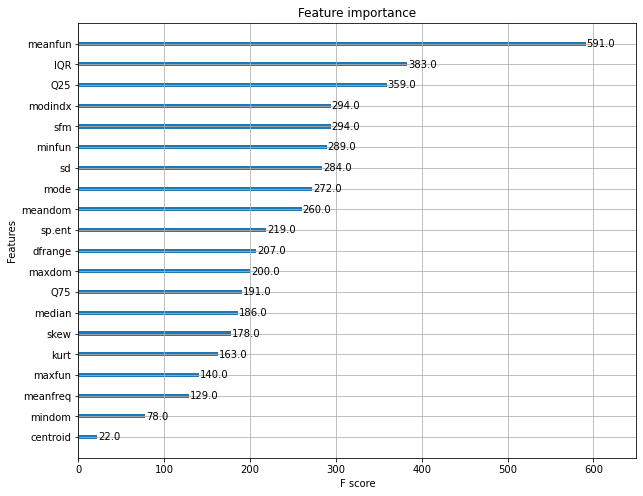

In [32]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from xgboost import plot_importance
fig, ax = plt.subplots(figsize=(10,8))
plot_importance(model_xgb, max_num_features=20, ax=ax)
# plt.show()

In [33]:
df_fea_scores = pd.DataFrame(columns=['col', 'score'])
for item in model_xgb.get_booster().get_score().items():
    df_fea_scores = df_fea_scores.append(pd.DataFrame([item], columns=['col', 'score']))

In [34]:
df_fea_scores.sort_values(by='score', ascending=False)

,col,score
0,meanfun,591.0
0,IQR,383.0
0,Q25,359.0
0,modindx,294.0
0,sfm,294.0
0,minfun,289.0
0,sd,284.0
0,mode,272.0
0,meandom,260.0
0,sp.ent,219.0


#### deepfm

In [35]:
from deepctr.models import DeepFM
from deepctr.feature_column import SparseFeat, DenseFeat, get_feature_names

In [36]:
sparse_features = X.select_dtypes(include='O').columns
dense_features = X.select_dtypes(exclude='O').columns

In [37]:
dense_features

Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx'],
      dtype='object')

In [38]:
# 1.Encoding for sparse features,and do simple Transformation for dense features
#已完成StandardScaler

In [39]:
# 2.count #unique features for each sparse field,and record dense feature field name
fixlen_feature_columns = [SparseFeat(feat, vocabulary_size=datas[feat].max() + 1, embedding_dim=4)
                          for i, feat in enumerate(sparse_features)] + [DenseFeat(feat, 1, ) for feat in dense_features]

In [40]:
fixlen_feature_columns

[DenseFeat(name='meanfreq', dimension=1, dtype='float32', transform_fn=None),
 DenseFeat(name='sd', dimension=1, dtype='float32', transform_fn=None),
 DenseFeat(name='median', dimension=1, dtype='float32', transform_fn=None),
 DenseFeat(name='Q25', dimension=1, dtype='float32', transform_fn=None),
 DenseFeat(name='Q75', dimension=1, dtype='float32', transform_fn=None),
 DenseFeat(name='IQR', dimension=1, dtype='float32', transform_fn=None),
 DenseFeat(name='skew', dimension=1, dtype='float32', transform_fn=None),
 DenseFeat(name='kurt', dimension=1, dtype='float32', transform_fn=None),
 DenseFeat(name='sp.ent', dimension=1, dtype='float32', transform_fn=None),
 DenseFeat(name='sfm', dimension=1, dtype='float32', transform_fn=None),
 DenseFeat(name='mode', dimension=1, dtype='float32', transform_fn=None),
 DenseFeat(name='centroid', dimension=1, dtype='float32', transform_fn=None),
 DenseFeat(name='meanfun', dimension=1, dtype='float32', transform_fn=None),
 DenseFeat(name='minfun', dim

In [41]:
#特征共用，放给低维linear_feature_columns和高维dnn_feature_columns
dnn_feature_columns = fixlen_feature_columns
linear_feature_columns = fixlen_feature_columns

In [42]:
feature_names = get_feature_names(linear_feature_columns + dnn_feature_columns)

In [43]:
# 3.generate input data for model
# train, test = train_test_split(datas, test_size=0.2, random_state=2020)
#增加检验，此种方式拆分的结果比使用deepctr.fit自带的拆分更稳定
train_X,eval_X,train_y,eval_y = train_test_split(X[feature_names], y, shuffle=True, test_size=0.2, stratify= y, random_state=2022)

In [44]:
train_model_input = {name: train_X[name] for name in feature_names}
eval_model_input = {name: eval_X[name] for name in feature_names}
# test_model_input = {name: test[name] for name in feature_names}

In [45]:
# 4.Define Model,train,predict and evaluate
model = DeepFM(linear_feature_columns, dnn_feature_columns, task='binary')
model.compile("adam", "binary_crossentropy", metrics=['binary_crossentropy','accuracy'], )

In [46]:
# history = model.fit(train_model_input, train[target].values, batch_size=256, epochs=10, verbose=2, validation_split=0.2, )
history = model.fit(train_model_input, train_y.values, batch_size=256, epochs=10, verbose=2, 
                    validation_data=(eval_model_input, eval_y.values),)# validation_batch_size=50)

Epoch 1/10
10/10 - 1s - loss: 0.4409 - binary_crossentropy: 0.4409 - accuracy: 0.8496 - val_loss: 0.3127 - val_binary_crossentropy: 0.3127 - val_accuracy: 0.9054
Epoch 2/10
10/10 - 0s - loss: 0.2020 - binary_crossentropy: 0.2020 - accuracy: 0.9522 - val_loss: 0.1506 - val_binary_crossentropy: 0.1506 - val_accuracy: 0.9495
Epoch 3/10
10/10 - 0s - loss: 0.1015 - binary_crossentropy: 0.1015 - accuracy: 0.9680 - val_loss: 0.0962 - val_binary_crossentropy: 0.0962 - val_accuracy: 0.9700
Epoch 4/10
10/10 - 0s - loss: 0.0718 - binary_crossentropy: 0.0717 - accuracy: 0.9743 - val_loss: 0.0855 - val_binary_crossentropy: 0.0854 - val_accuracy: 0.9748
Epoch 5/10
10/10 - 0s - loss: 0.0610 - binary_crossentropy: 0.0610 - accuracy: 0.9771 - val_loss: 0.0868 - val_binary_crossentropy: 0.0868 - val_accuracy: 0.9748
Epoch 6/10
10/10 - 0s - loss: 0.0555 - binary_crossentropy: 0.0555 - accuracy: 0.9818 - val_loss: 0.0788 - val_binary_crossentropy: 0.0788 - val_accuracy: 0.9748
Epoch 7/10
10/10 - 0s - loss

In [47]:
# pred_ans = model.predict(test_model_input, batch_size=256)
pred_ans = model.predict(eval_model_input, batch_size=256)
print("test LogLoss", round(log_loss(eval_y.values, pred_ans), 4))
print("test AUC", round(roc_auc_score(eval_y.values, pred_ans), 4))

test LogLoss nan
test AUC 0.9964


D:\anaconda3\envs\tens\lib\site-packages\sklearn\metrics\_classification.py:2442: RuntimeWarning: divide by zero encountered in log
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
D:\anaconda3\envs\tens\lib\site-packages\sklearn\metrics\_classification.py:2442: RuntimeWarning: invalid value encountered in multiply
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)


In [48]:
pred_ans

array([[9.99814987e-01],
       [9.99996364e-01],
       [9.95122313e-01],
       [2.17343604e-05],
       [9.80417073e-01],
       [9.99917507e-01],
       [6.16341829e-04],
       [4.52803761e-01],
       [9.99994695e-01],
       [8.41546059e-03],
       [7.05450773e-04],
       [9.99996543e-01],
       [9.99995708e-01],
       [9.99590397e-01],
       [9.54640865e-01],
       [3.21235093e-05],
       [3.20583582e-04],
       [4.20956057e-05],
       [9.95111704e-01],
       [9.99984562e-01],
       [1.26338005e-02],
       [9.99927759e-01],
       [3.76906991e-03],
       [1.75984204e-02],
       [9.99807596e-01],
       [6.63161190e-05],
       [9.99261975e-01],
       [2.50400467e-06],
       [9.97797370e-01],
       [9.99996781e-01],
       [2.14290619e-03],
       [9.99782324e-01],
       [3.18673253e-03],
       [2.02098489e-03],
       [9.99323905e-01],
       [5.29277325e-03],
       [4.20153141e-04],
       [2.49191195e-01],
       [2.63363123e-04],
       [2.19751073e-05],


In [49]:
y_pred = [0 if x < 0.5 else 1 for x in pred_ans]

In [50]:
accuracy_score(y_pred, eval_y)

0.9763406940063092